In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MSE

In [4]:
import PIL
import pandas as pd

In [5]:
img=PIL.Image.open("panda2.jpg").resize((100,100))

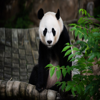

In [6]:
img

In [7]:
image=np.array(img).mean(axis=2)

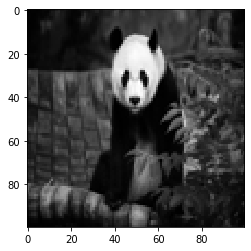

In [8]:
plt.imshow(image,cmap="gray")

In [9]:
orignal=image.flatten()

In [10]:
orignal.shape

(10000,)

In [11]:
population=np.random.randint(0,255,(1000,orignal.shape[0]))

In [12]:
population.shape

(1000, 10000)

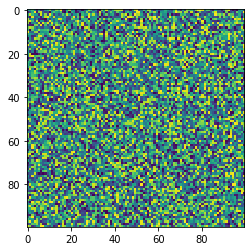

In [13]:
plt.imshow(population[0].reshape(*image.shape))

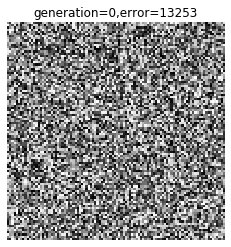

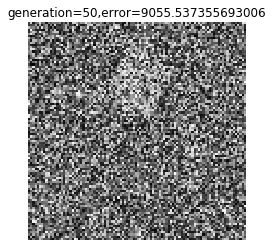

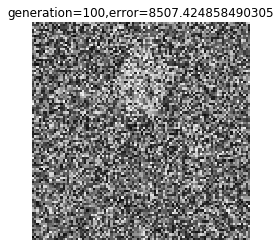

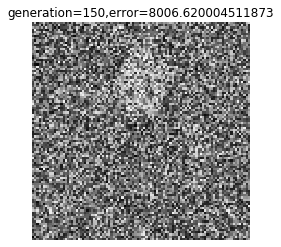

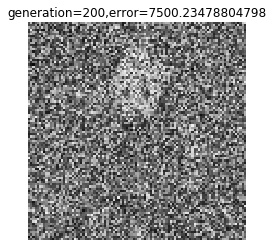

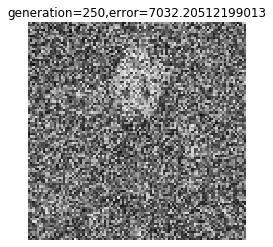

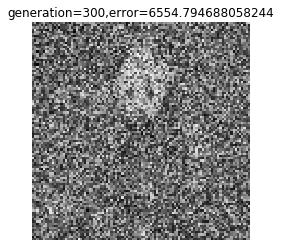

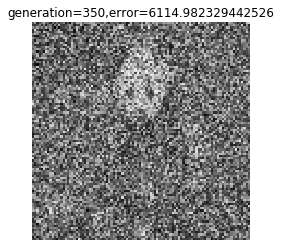

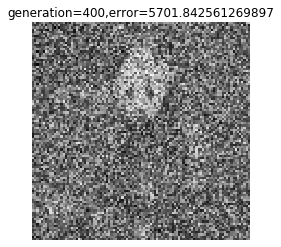

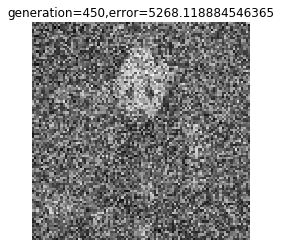

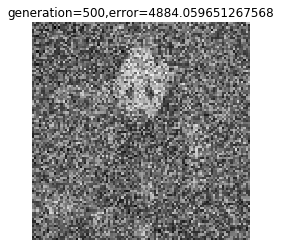

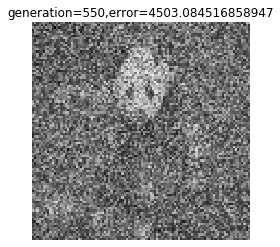

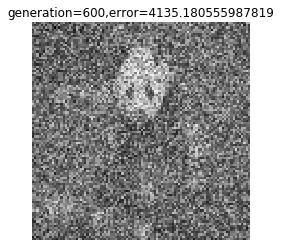

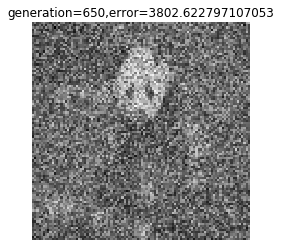

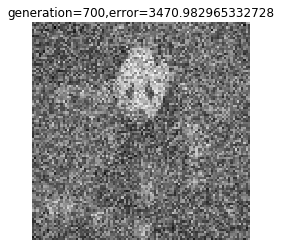

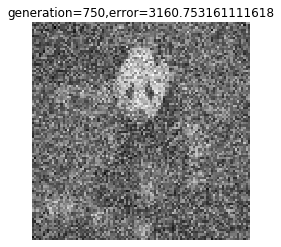

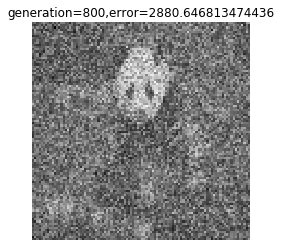

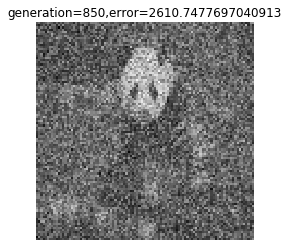

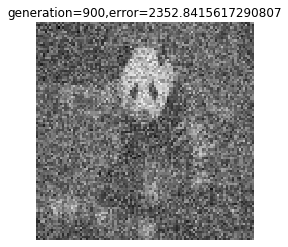

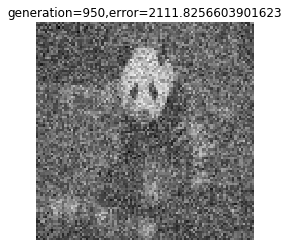

In [14]:
for generation in range(1000):
    error=MSE(orignal,population).numpy()
    indices=error.argsort()
    fit=population[indices[:10]]
    
    first=fit[np.random.randint(0,10,1000)]
    second=fit[np.random.randint(0,10,1000)]
    data=np.stack([first,second],axis=2)
    
    first_sel=np.random.randint(0,2,population.shape)
    second_sel=1-first_sel
    selector=np.stack([first_sel,second_sel],axis=2)
    
    mutation=np.random.randn(*population.shape)
    population=(data*selector).sum(axis=2) + mutation
    
    if generation%50==0:
        plt.figure()
        plt.title("generation={},error={}".format(generation,str(error[0])))
        plt.imshow(population[0].reshape(*image.shape),cmap="gray")
        plt.axis(False)
        plt.show()